<a href="https://colab.research.google.com/github/achmadbauravindah/ImageStyleTransfer-TransferLearning-MyCroissant/blob/main/ImageStyleTransfer_TransferLearning_MyCroissant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import tensorflow as tf
import tensorflow_hub as hub
import PIL.Image
import numpy as np

In [8]:
# Download image
_ = ! wget https://raw.githubusercontent.com/achmadbauravindah/ImageStyleTransfer-TransferLearning-MyCroissant/main/achmadbauravindah.jpeg 
_ = ! wget https://raw.githubusercontent.com/achmadbauravindah/ImageStyleTransfer-TransferLearning-MyCroissant/main/croissant.jpeg

In [9]:
def image_to_tensor(path_to_img):
    img = tf.io.read_file(path_to_img)
    img = tf.image.decode_image(img, channels=3, dtype=tf.float32)
    
    # Resize the image to specific dimensions
    img = tf.image.resize(img, [512, 512])
    img = img[tf.newaxis, :]
    return img
    
def tensor_to_image(tensor):
  tensor = tensor*255
  tensor = np.array(tensor, dtype=np.uint8)
  if np.ndim(tensor)>3:
    assert tensor.shape[0] == 1
    tensor = tensor[0]
  return PIL.Image.fromarray(tensor)

In [11]:
# Image to Tensor
ravin_tensor = image_to_tensor('achmadbauravindah.jpeg')
style_tensor = image_to_tensor('croissant.jpeg')

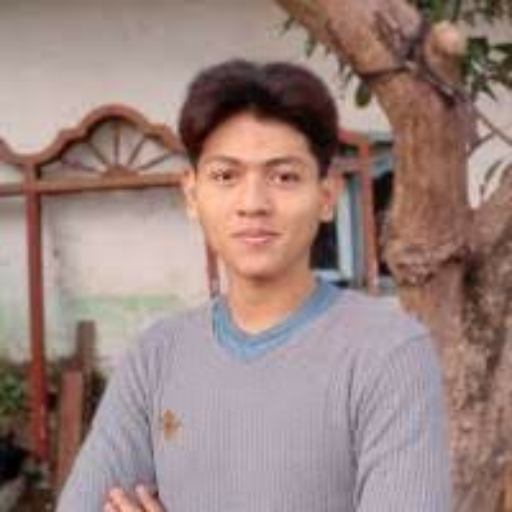

In [13]:
# Show ravin tensor image
tensor_to_image(ravin_tensor)

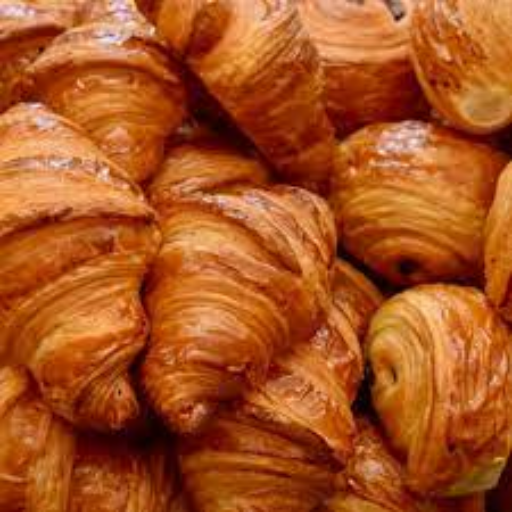

In [14]:
# Show croissant image as style image
tensor_to_image(style_tensor)

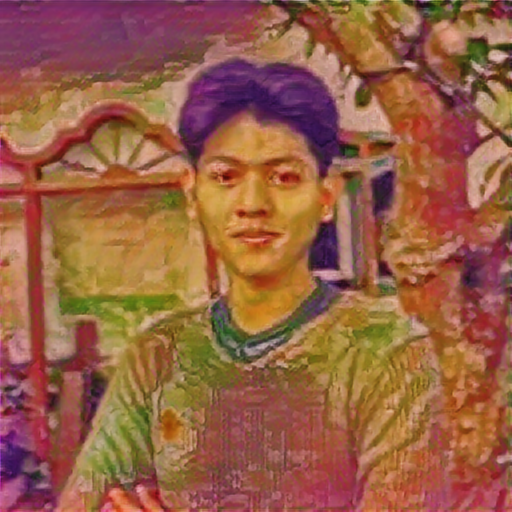

In [15]:
# Combine 2 image become style transfer 
hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/1')
stylized_image = hub_module(tf.constant(ravin_tensor), tf.constant(style_tensor))[0]
tensor_to_image(stylized_image)